# Tilt Correction

This module will correct the tilt of the image. The pipeline performs the following operations:

- [x] Load image without legend
- [x] Threshold the image if necessary
- [x] Dilate the image
- [x] Find the blobs in the image
- [x] Find the center points of the blobs
- [x] Draw lines between the center points
- [x] Find the average angle of these lines

First we load the image and convert it to greyscale

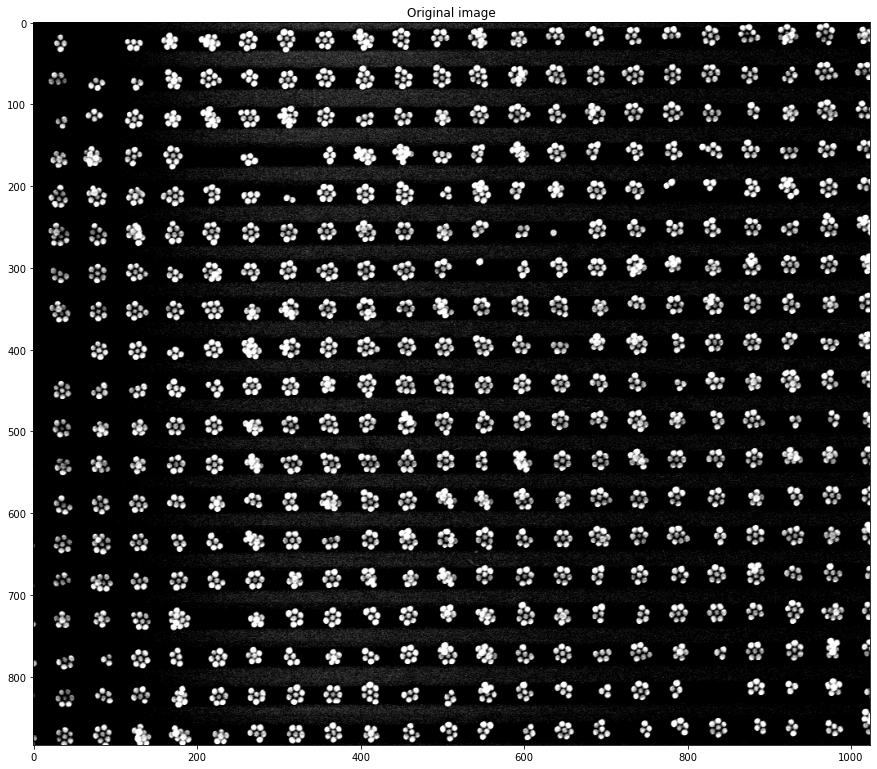

In [1]:
%matplotlib inline

import modules.oiplib as lib

img = lib.loadImage("../images/heptamers.png")

img = lib.rgb2GrayLuminosity(img)

originalPlot, originalAx = lib.showImage(img, title="Original image", figsize=(15,15))

Now we convert it to a binary image.

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bbd4eb0>)

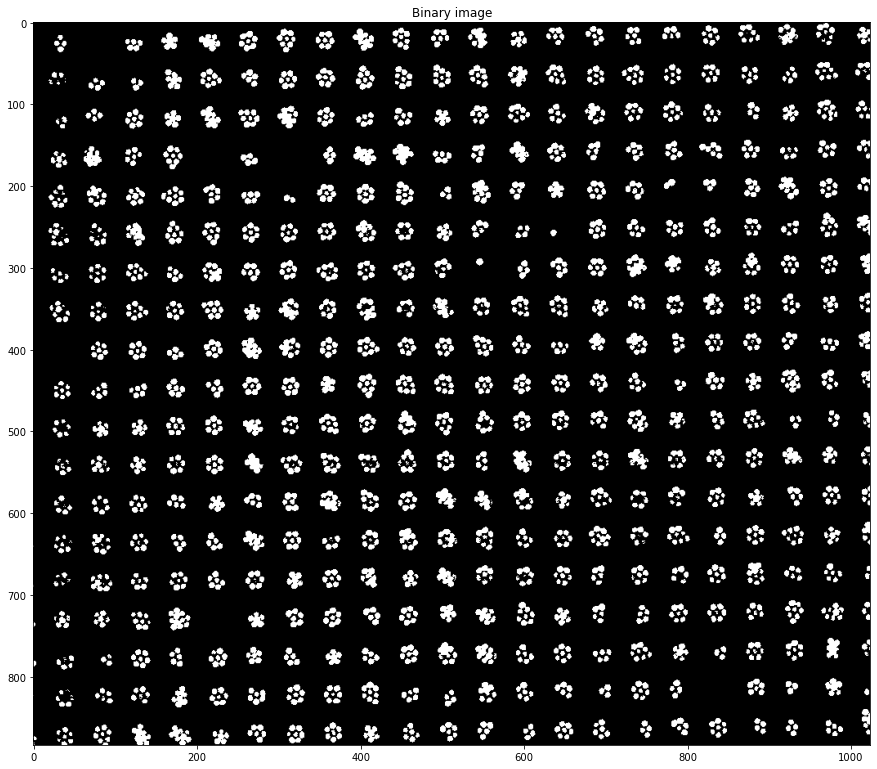

In [2]:
imgBin = lib.threshold_binary(img, 127)

lib.showImage(imgBin * 255, title="Binary image",figsize=(15,15))

Now we dilate the image.

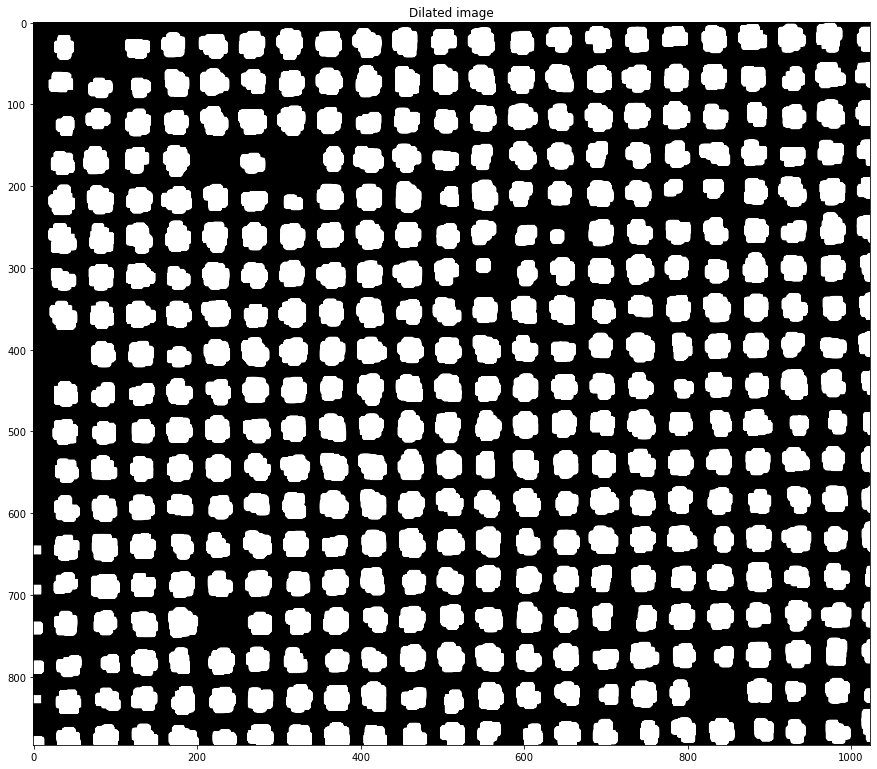

In [3]:
import scipy
# Create structure
import numpy as np
struct = np.ones((10,10))

# Import time library for performance testing.
import time

# Convolute image and structure
imgDilated = scipy.signal.convolve2d(imgBin, struct, fillvalue=0)

imgDilated = imgDilated[:img.shape[0], :img.shape[1]] #Reshape image

dilatedFig, dilatedAx = lib.showImage(imgDilated, vmax=1,title="Dilated image", figsize=(15,15))

We get the midpoints of each cluster using blobs

In [4]:
points = lib.getPoints(imgDilated)

c:\users\kasper\.virtualenvs\oip_image_processing_assignment_1-wpneiy9r\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
c:\users\kasper\.virtualenvs\oip_image_processing_assignment_1-wpneiy9r\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
c:\users\kasper\.virtualenvs\oip_image_processing_assignment_1-wpneiy9r\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
c:\users\kasper\.virtualenvs\oip_image_processing_assignment_1-wpneiy9r\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


Now we plot all the points to get a visual overview.

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b76e7d0>)

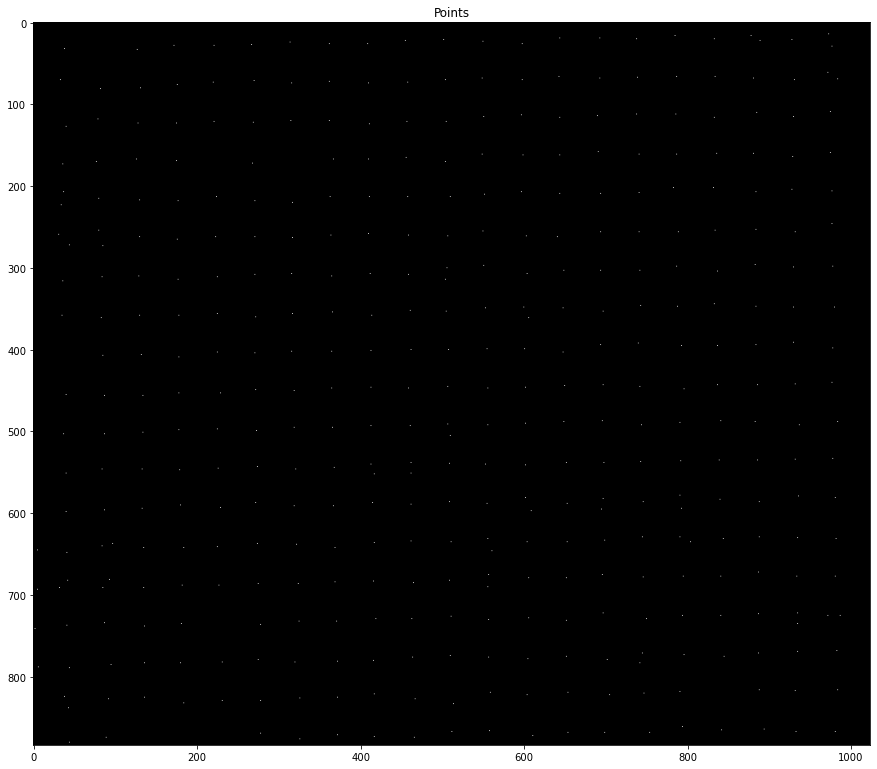

In [5]:
lib.showImage(points, vmax=1, figsize=(15,15), title="Points")

We divide the image into the top half and bottom half. Then we get a list of all points (only the coordinates of the points).

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b7e5370>)

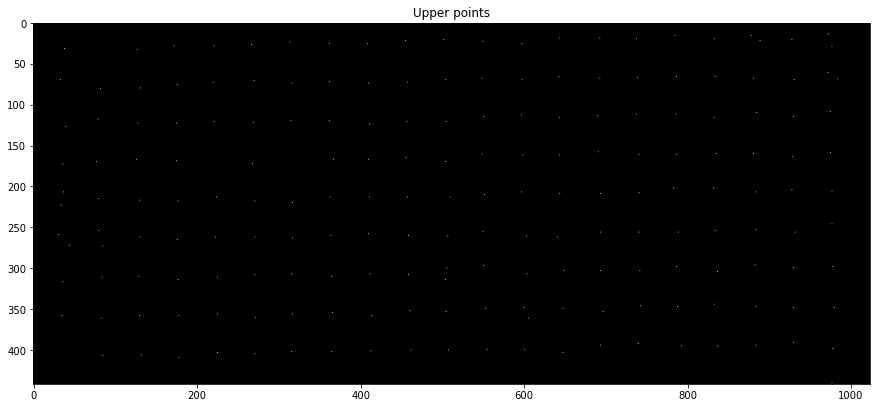

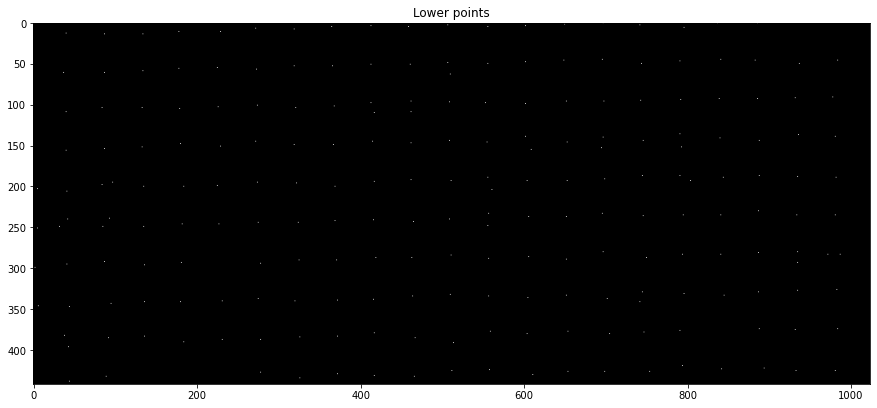

In [6]:
upperHalfPoints, lowerHalfPoints = lib.divideImage(points)

lib.showImage(upperHalfPoints, vmax=1, figsize=(15,15), title="Upper points")
lib.showImage(lowerHalfPoints, vmax=1, figsize=(15,15), title="Lower points")

Now we find all angles less than 1 degree (since the image is only very slightly tilted, we can ignore other values as errors)

In [7]:
angles = lib.angleBetweenPoints(upperHalfPoints, lowerHalfPoints, angleThreshold=1)

Finally we rotate the image by the average angle offset.

In [8]:
adjustedImage = lib.rotateImage(img, np.average(angles))

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c772730>)

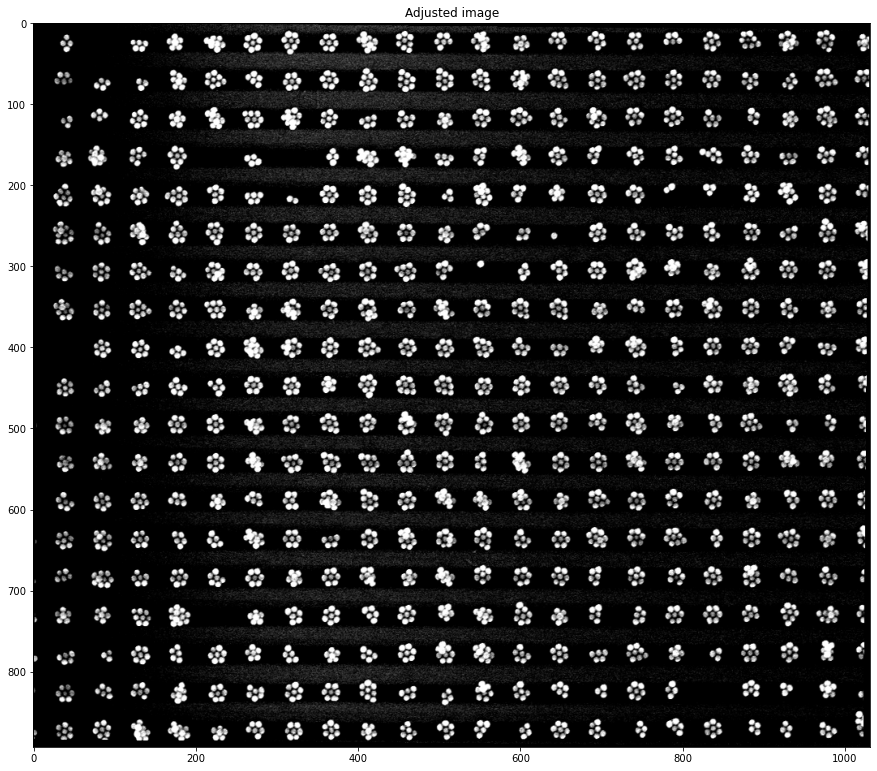

In [9]:
lib.showImage(adjustedImage, figsize=(15,15), title="Adjusted image")